<a href="https://colab.research.google.com/github/alessandropequeno/PPGEEC-Deep-Learning-UFRN/blob/main/questao_1_lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Considere o problema das espirais. Sendo a espiral 1 uma classe e  a espiral 2 outra classe. Gere os dados usando as seguintes equações:
para espiral 1:   x = Θ/4 cosΘ  :. y = Θ/4 senΘ  :.  Θ ≥ 0

para espiral 2:   x = (Θ/4 + 0.8) cosΘ   :.  y = (Θ/4 + 0.8) senΘ  :.  Θ ≥ 0

fazendo Θ assumir 1000 valores igualmente espaçados entre 0 e 20 radianos. Solucione este problema considerando:

a) Uma SVM

### Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

### Definir as funções para gerar os dados das espirais

In [2]:
def espiral1(theta):
    x = (theta / 4) * np.cos(theta)
    y = (theta / 4) * np.sin(theta)
    return x, y

def espiral2(theta):
    x = ((theta / 4) + 0.8) * np.cos(theta)
    y = ((theta / 4) + 0.8) * np.sin(theta)
    return x, y

### Gerar os valores de Θ

In [3]:
theta = np.linspace(0, 20, 1000)

### Gerar os pontos da espiral 1 e 2

In [4]:
x_espiral1 = np.stack([espiral1(theta)[0], espiral1(theta)[1]], axis=1)
x_espiral2 = np.stack([espiral2(theta)[0], espiral2(theta)[1]], axis=1)

### Plotar as duas curvas

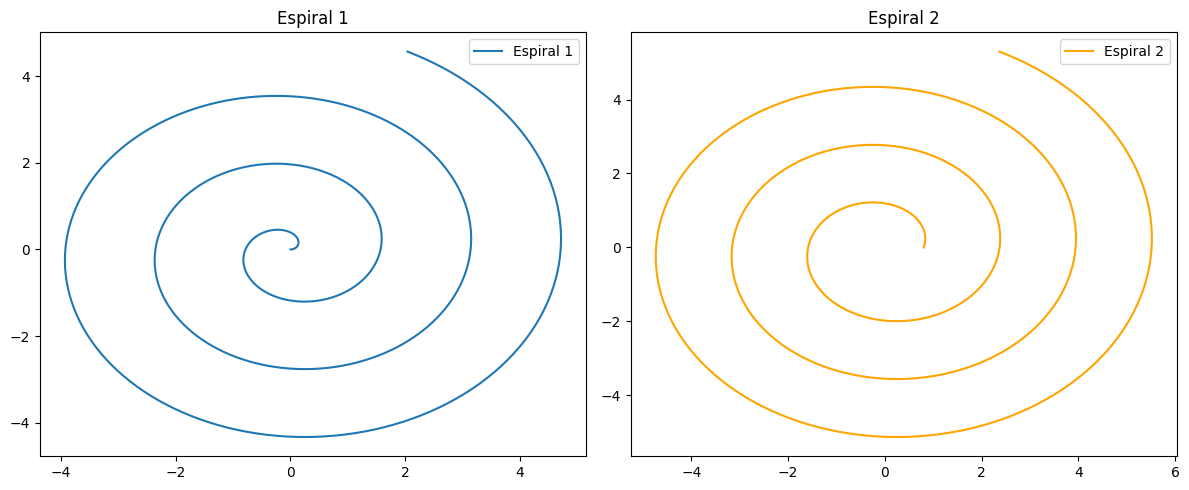

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(x_espiral1[:, 0], x_espiral1[:, 1], label='Espiral 1')
ax1.set_title('Espiral 1')
ax1.legend()

ax2.plot(x_espiral2[:, 0], x_espiral2[:, 1], color='orange', label='Espiral 2')
ax2.set_title('Espiral 2')
ax2.legend()

plt.tight_layout()
plt.show()

### Criar os rótulos para os pontos das espirais

In [6]:
y_espiral1 = np.zeros(len(x_espiral1))
y_espiral2 = np.ones(len(x_espiral2))

### Combinar os pontos de dados das espirais e seus rótulos

In [7]:
X = np.concatenate([x_espiral1, x_espiral2])
y = np.concatenate([y_espiral1, y_espiral2])

Misturar os dados

In [8]:
np.random.seed(42)  # Para garantir a reprodutibilidade dos resultados
shuffle_indices = np.random.permutation(len(X))
X_shuffled = X[shuffle_indices]
y_shuffled = y[shuffle_indices]

### Dividir os dados em conjuntos de treinamento e teste

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)


### plotar o dados de treino e validação

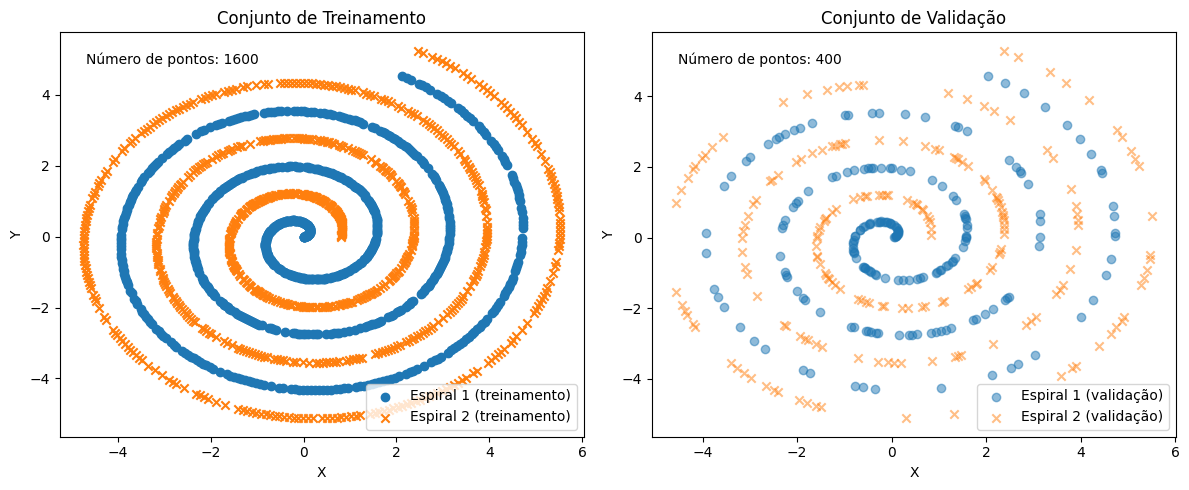

In [20]:
# Configuração dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotar os pontos de treinamento no primeiro subplot
axs[0].scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Espiral 1 (treinamento)')
axs[0].scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Espiral 2 (treinamento)', marker='x')
axs[0].set_title('Conjunto de Treinamento')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend(loc='lower right')
# Adicionar texto com a quantidade de pontos de treinamento
axs[0].text(0.05, 0.95, f"Número de pontos: {len(X_train)}", transform=axs[0].transAxes, fontsize=10, verticalalignment='top')

# Plotar os pontos de validação no segundo subplot
axs[1].scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label='Espiral 1 (validação)', alpha=0.5)
axs[1].scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Espiral 2 (validação)', marker='x', alpha=0.5)
axs[1].set_title('Conjunto de Validação')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend(loc='lower right')
# Adicionar texto com a quantidade de pontos de validação
axs[1].text(0.05, 0.95, f"Número de pontos: {len(X_test)}", transform=axs[1].transAxes, fontsize=10, verticalalignment='top')

# Ajustar o layout
plt.tight_layout()

### Inicializar e treinar o classificador SVM (Kernel = linear)

In [21]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

### Configurar subplots

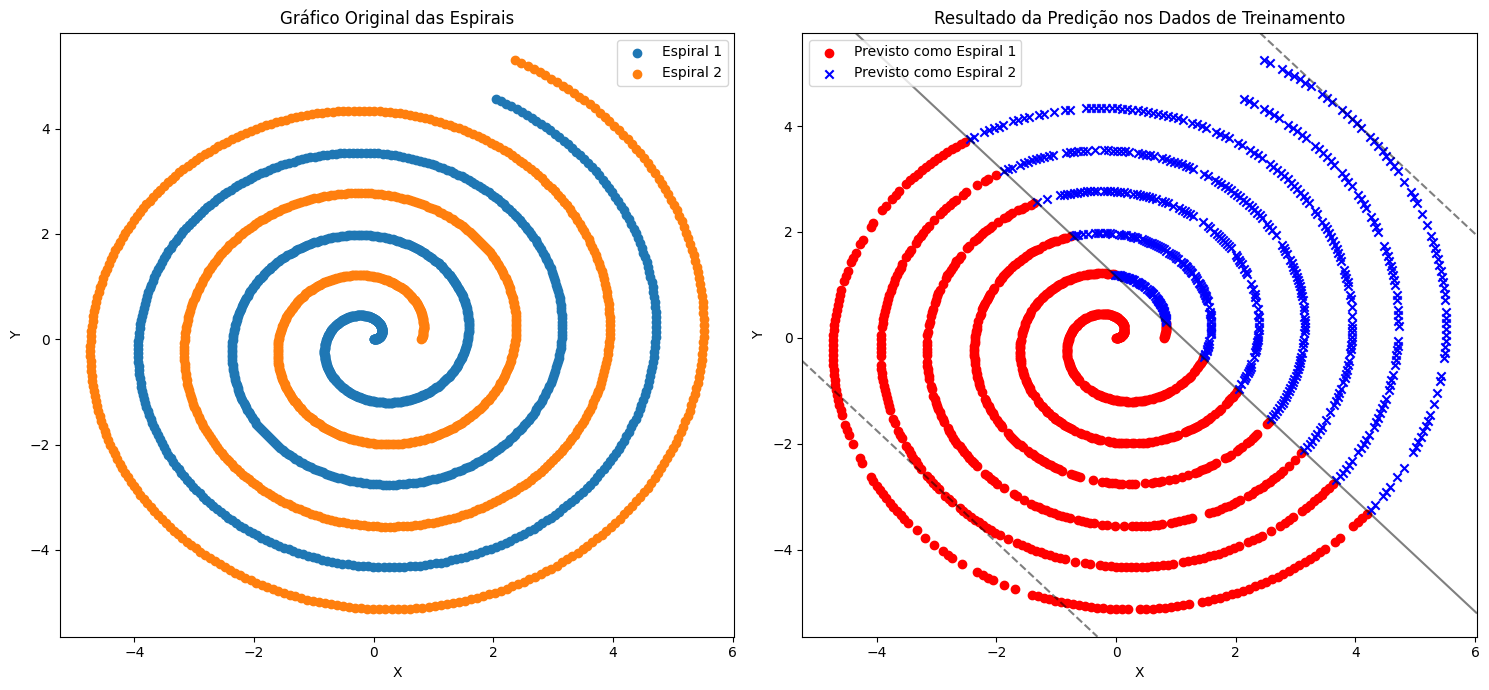

Acurácia = 0.5369


In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plotar os pontos das espirais nos subplots correspondentes
axs[0].scatter(x_espiral1[:, 0], x_espiral1[:, 1], label='Espiral 1')
axs[0].scatter(x_espiral2[:, 0], x_espiral2[:, 1], label='Espiral 2')
axs[0].set_title('Gráfico Original das Espirais')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()

y_train_pred = svm_classifier.predict(X_train)

# Plotar os pontos de treinamento coloridos de acordo com as previsões no segundo subplot
axs[1].scatter(X_train[y_train_pred == 0][:, 0], X_train[y_train_pred == 0][:, 1], marker='o', label='Previsto como Espiral 1', color='red')
axs[1].scatter(X_train[y_train_pred == 1][:, 0], X_train[y_train_pred == 1][:, 1], marker='x', label='Previsto como Espiral 2', color='blue')
axs[1].set_title('Resultado da Predição nos Dados de Treinamento')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()

# Adicionar linhas de decisão geradas pelos vetores de suporte
xlim = axs[1].get_xlim()
ylim = axs[1].get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

axs[1].set_title('Resultado da Predição nos Dados de Treinamento')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

epochs = 100  # Número de épocas de treinamento
accuracy_history = []
for epoch in range(epochs):
    svm_classifier.fit(X_train, y_train)
    accuracy = svm_classifier.score(X_train, y_train)
    accuracy_history.append(accuracy)

# Imprimir a acurácia ao longo das épocas# SVM com kernel RBF (gaussiano)
svm_rbf = SVC(kernel='rbf')
print(f"Acurácia = {acc:.4f}")

### Inicializar e treinar o classificador SVM (kernel='rbf')

In [28]:
# SVM com kernel RBF (gaussiano)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

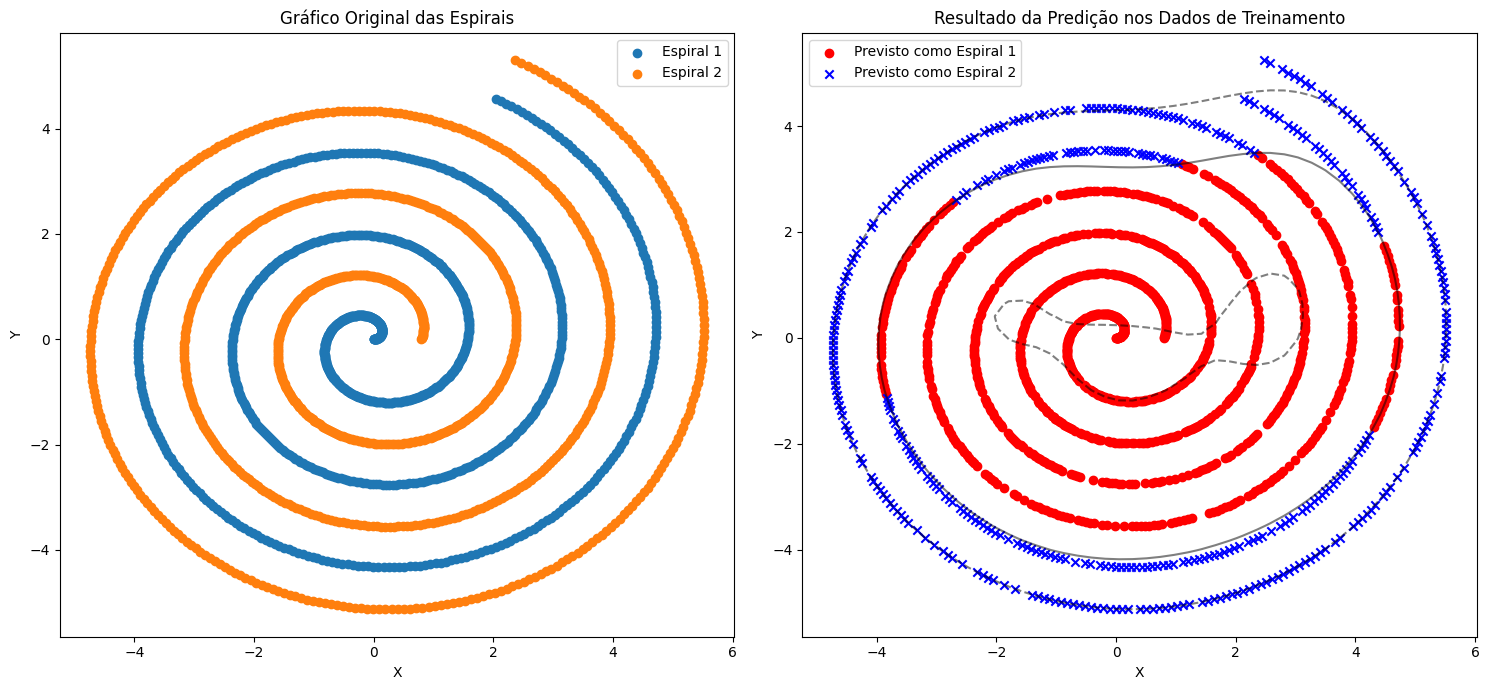

Acurácia = 0.5369


In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plotar os pontos das espirais nos subplots correspondentes
axs[0].scatter(x_espiral1[:, 0], x_espiral1[:, 1], label='Espiral 1')
axs[0].scatter(x_espiral2[:, 0], x_espiral2[:, 1], label='Espiral 2')
axs[0].set_title('Gráfico Original das Espirais')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()

y_train_pred = svm_rbf.predict(X_train)

# Plotar os pontos de treinamento coloridos de acordo com as previsões no segundo subplot
axs[1].scatter(X_train[y_train_pred == 0][:, 0], X_train[y_train_pred == 0][:, 1], marker='o', label='Previsto como Espiral 1', color='red')
axs[1].scatter(X_train[y_train_pred == 1][:, 0], X_train[y_train_pred == 1][:, 1], marker='x', label='Previsto como Espiral 2', color='blue')
axs[1].set_title('Resultado da Predição nos Dados de Treinamento')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()

# Adicionar linhas de decisão geradas pelos vetores de suporte
xlim = axs[1].get_xlim()
ylim = axs[1].get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

axs[1].set_title('Resultado da Predição nos Dados de Treinamento')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

epochs = 100  # Número de épocas de treinamento
accuracy_history = []
for epoch in range(epochs):
    svm_rbf.fit(X_train, y_train)
    accuracy = svm_rbf.score(X_train, y_train)
    accuracy_history.append(accuracy)

# Imprimir a acurácia ao longo das épocas
print(f"Acurácia = {acc:.4f}")